**Shifted Rastrigin Function**

Environment : Python 3.8.2 & Jupyter Notebook<br>

The objective is to solve unconstrained problem : F4 as described in the “CEC2008_TechnicalReport.pdf” for both dimensions D = 50 and D = 500. <br>
F4: Shifted Rastrigin <br>

The coordinates of the shifted global minimum of this function in dim = 1000 are provided in a numpy array in a data file "data.py". These are the target coordinates to be achieved.<br>
F4: rastrigindat -> shape = (1000,) <br>

The fitness or value of this function at its minimum is also available in numpy array "f_bias" in "data.py". This is the the target fitness value to achieve.<br>
f_bias[3] = F4_min = -330
<img src="Functions.png">

Import Libraries

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from pygmo import *

**Import Data**

In [2]:
# Import data in data.py file and print shape of input arrays
from data import *
print(rastrigindat.shape)
print(f_bias[3])

(1000,)
-330.0


- Algorithm : Genetic Algorithm<br> Function F4 is highly multimodal with a huge number of local minima. GA can optimize better by mimicing natural selection in low dimensions where gradient-based or deterministic-transition-based heuristics would fail. However as dimensionality grows, GA becomes very computationally intensive.
- Library : PyGMO
- Parameters of the algorithm : Population size, number of generations
- Stopping criterion : Number of generations completed
- Number of function evaluations : see below
- Computational time : see below
- Convergence curve : see below
- Final results (solution and fitness) : see below

In [5]:
# Define objective function to minimize
def Shifted_Rastrigin(x):
    z = np.subtract(x[:dim], rastrigindat[:dim])
    return f_bias[3] + np.sum(np.power(z, 2) - 10*np.cos(2*np.pi*z) + 10)

# Define user-defined problem (udp) classes that implement methods describing the optimization problems.
# Classes to be used to construct an instance of pygmo.problem class

# fitness() method returns the fitness of the input
# get_bounds() returns the box bounds of the problem or search space

class shifted_rastrigin:
    def fitness(self, x):
        return [Shifted_Rastrigin(x)]
    def get_bounds(self):
        return ([-5]*dim, [5]*dim)

def Minimize_GA(input_prob=None, popsize=None, generations=None, targetmin=None):
    """Minimize the input problem with the genetic algorithm"""
    
    print("Number of dimensions : {}".format(dim))
        
    since = time.time()
    
    # Instanciate simple genetic algorithm class of pygmo library
    simple_gen_algo = sga(gen = generations, cr = .90, eta_c = 1., m = 0.02,\
                          param_m = 1., param_s = 2, crossover = "exponential",\
                          mutation = "polynomial", selection = "tournament", seed = 100)
    
    # Intanciate optimization algorithm class
    algo = algorithm(simple_gen_algo)
    
    # Set algorithm verbosity - 1 for logging outputs at each generation
    algo.set_verbosity(1)
    
    # Construct an instance of pygmo.problem class by overriding specific methods with those implemented in
    # input user-defined problem class
    prob = problem(input_prob())
    
    # Generate a population of potential candidate solutions of size=popsize to solve prob
    pop = population(prob, size=popsize, seed=100)
    
    # Core of the optimization - selection + crossover + mutation + insertion over specified number of generations
    pop = algo.evolve(pop)
    
    till = time.time()
    
    # Extract a reference to the internal user-defined algorithm
    uda = algo.extract(sga)
    
    # Log extraction
    log = uda.get_log()

    Gen, Fevals, Best_fitness, Improvement = [], [], [], []
    
    # Fetch cumulative number of function evaluatiions and best fitness at each generation
    for x in log:
        Gen.append(x[0])
        Fevals.append(x[1])
        Best_fitness.append(x[2])
        #Improvement.append(x[3])
    
    # Show results
    plt.plot(Gen, Best_fitness, label="Convergence curve")
    plt.axhline(y=targetmin, color="r", label="Actual Minimum = "+str(targetmin))
    plt.legend()
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.show()

    print("Computational time : {:.2f} s".format(till-since))
    print("Fitness at minimum (result): {:.4f} ".format(pop.champion_f[0]))
    print("Fitness at minimum (real): {:.4f} ".format(targetmin))
    print("Function evaluations : {}".format(Fevals[-1]))
    print("x_minimum :\n{}".format(pop.champion_x))

D = 50

Number of dimensions : 50


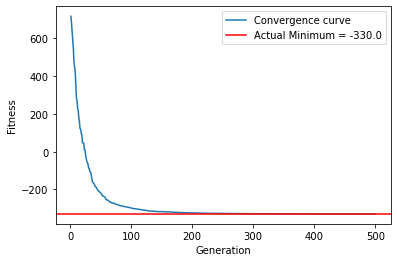

Computational time : 6.18 s
Fitness at minimum (result): -329.6562 
Fitness at minimum (real): -330.0000 
Function evaluations : 250000
x_minimum :
[ 3.8445029   4.32350172 -2.82094714  0.65101729  4.34134719  2.4518979
 -3.45837169  2.33679796  3.98684961  4.28920696  2.37466364  3.22368391
 -0.03015515  4.62886165  4.61260103  1.00211922  1.60986279 -4.72879932
 -2.69597587  1.04105149 -3.20697928  3.80413119 -2.68332708 -3.2326649
  4.41554516  0.72769314 -4.42269654  1.48966534  0.74542177  2.17860479
 -3.28385668  2.78442732  3.59878861 -4.71983633  0.52453038 -3.60061987
 -3.20207392  0.46642729 -2.02516696 -0.39103262 -3.7774805   4.97467407
  4.32950387  3.35475572 -4.86575813  4.83989896  0.23326813 -4.29119339
  3.68337675  4.79274785]


In [6]:
dim = 50
Minimize_GA(input_prob=shifted_rastrigin, popsize=500, generations=500, targetmin=f_bias[3])

D = 500

Number of dimensions : 500


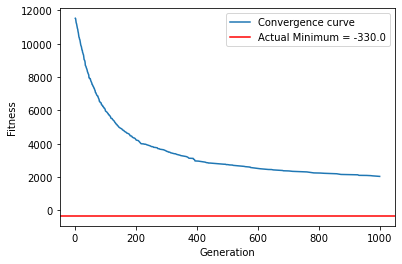

Computational time : 154.30 s
Fitness at minimum (result): 2036.0757 
Fitness at minimum (real): -330.0000 
Function evaluations : 2500000
x_minimum :
[ 0.7405601   3.29026907 -0.85676669  0.68875518  2.39601078  3.39258157
 -4.56507596  4.33760816  4.87333086  3.1224938   3.388322    1.22996161
 -0.83700174  3.62037844  2.59715258  0.81699197 -0.34000725 -3.54971857
 -4.7211697   1.03472075 -0.21118126  3.89653642 -1.71465092 -4.24253236
  2.44944816  1.07731763 -4.3231058  -1.39151783 -1.38951199  3.27435998
 -2.25501851  2.69082982  3.51808451 -4.73252804  0.66358207 -3.72005065
 -2.13570599  2.43424518 -0.92471484 -2.21692152 -4.97619905  4.0105171
  3.25307418  1.43619355 -3.44691714  2.92378506  3.09215481 -4.19835113
 -0.31784032  3.80129257 -3.06957529  3.43778178 -2.27051468  1.27341725
  0.58164863 -3.3365997  -3.40505953  2.6978532  -1.41913296 -1.8401715
  2.18417156 -0.11249535  3.40136105  0.83228633  4.48957032  4.14494401
  2.33161427 -0.21860547  0.34121582  0.0372994 

In [7]:
dim = 500
Minimize_GA(input_prob=shifted_rastrigin, popsize=2500, generations=1000, targetmin=f_bias[3])

The genetic algorithm provides a decent result for D=50 in 6 seconds with not more than 5000D function evaluations.
However for D=500, the algorithm fails to reach the optimum within 5000D function evaluations. Further evolution parameter tuning may improve performance for high dimensions.